
DATA CLEANING
Missing Values : 
Datetime    0
PJMW_MW     0
dtype: int64
Duplicate Values : 
0

DATA ANALYSIS
Summary Statistics : 
                            Datetime        PJMW_MW
count                         143206  143206.000000
mean   2010-06-02 03:39:50.656816128    5602.375089
min              2002-04-01 01:00:00     487.000000
25%              2006-05-02 03:15:00    4907.000000
50%              2010-06-02 04:30:00    5530.000000
75%              2014-07-03 06:45:00    6252.000000
max              2018-08-03 00:00:00    9594.000000
std                              NaN     979.142872

MODELLING
Mean Squared Error: 945877.2740823523
R-squared: 0.018793836293276023


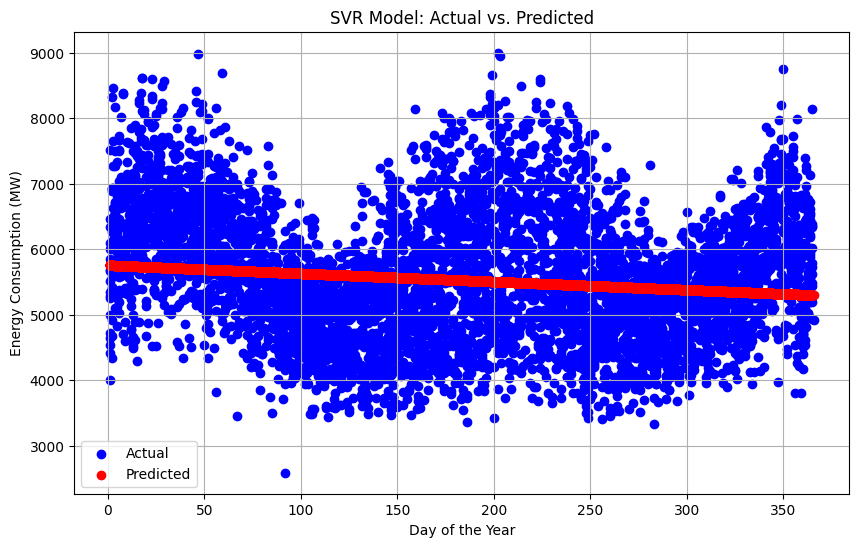


DATA VISUALIZATION
LinePlot : 


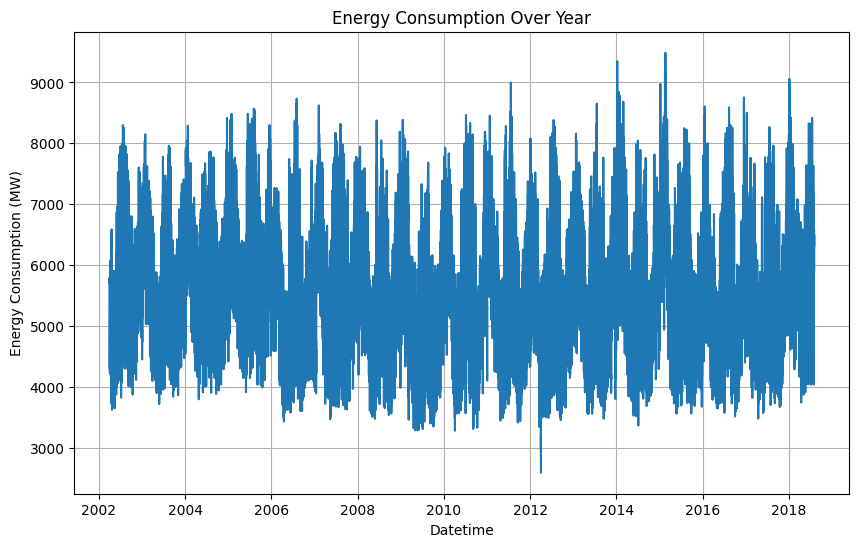

Histogram : 


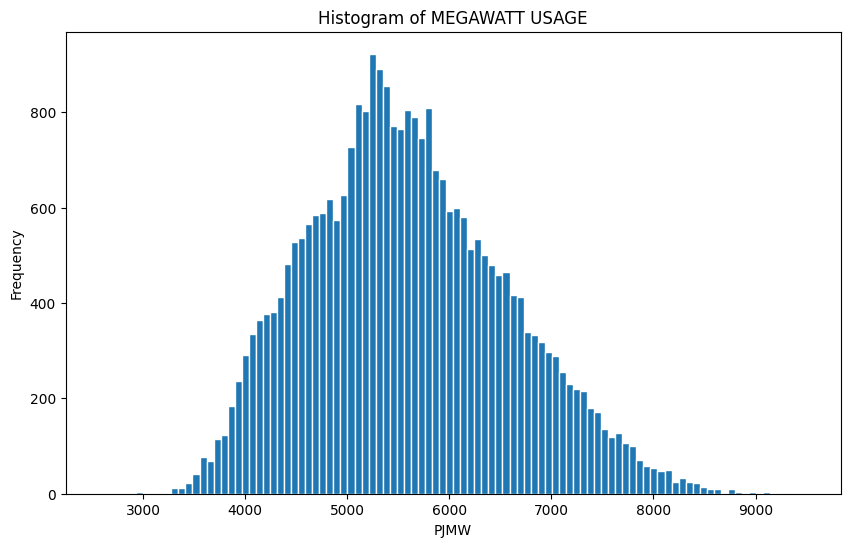

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

RED = "\033[91m"
GREEN = "\033[92m"
YELLOW = "\033[93m"
BLUE = "\033[94m"
RESET = "\033[0m"

df = pd.read_csv("PJMW_hourly.csv")

df["Datetime"] = pd.to_datetime(df["Datetime"])

# DATA CLEANING
print(BLUE + "\nDATA CLEANING" + RESET)
# --- Check for missing values
missing_values = df.isnull().sum()
print(GREEN + "Missing Values : " + RESET)
print(missing_values)
# --- Handle missing values
df.dropna(inplace=True)
# --- Check for duplicate values
duplicate_values = df.duplicated().sum()
print(GREEN + "Duplicate Values : " + RESET)
print(duplicate_values)
# --- Drop duplicate values
df.drop_duplicates(inplace=True)

# DATA ANALYSIS
print(BLUE + "\nDATA ANALYSIS" + RESET)
# --- Summary Statistics
summary_stats = df.describe()
print(GREEN + "Summary Statistics : " + RESET)
print(summary_stats)

# SUPPORT VECTOR MODELLLING
print(BLUE + "\nMODELLING" + RESET)
# Reduce the dataset size for faster training
df = df.sample(frac=0.2, random_state=42)
# Split the data into features (Datetime) and target (AEP_MW)
X = df[["Datetime"]]
y = df["PJMW_MW"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Preprocess the features (Datetime) to extract the day of the year
X_train["DayOfYear"] = X_train["Datetime"].dt.dayofyear
X_test["DayOfYear"] = X_test["Datetime"].dt.dayofyear
# Convert X_train and X_test to NumPy arrays
X_train = X_train["DayOfYear"].values.reshape(-1, 1)
X_test = X_test["DayOfYear"].values.reshape(-1, 1)
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create an SVR (Support Vector Regression) model with a linear kernel
svr = SVR(kernel="linear", C=1.0)
# Train the SVR model
svr.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred = svr.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="b", label="Actual")
plt.scatter(X_test, y_pred, color="r", label="Predicted")
plt.xlabel("Day of the Year")
plt.ylabel("Energy Consumption (MW)")
plt.title("SVR Model: Actual vs. Predicted")
plt.legend()
plt.grid()
plt.show()
# DATA VISUALIZATION
print(BLUE + "\nDATA VISUALIZATION" + RESET)
# --- Line plot
print(GREEN + "LinePlot : " + RESET)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Datetime", y="PJMW_MW")
plt.xlabel("Datetime")
plt.ylabel("Energy Consumption (MW)")
plt.title("Energy Consumption Over Year")
plt.grid()
plt.show()
# --- Histogram
print(GREEN + "Histogram : " + RESET)
plt.figure(figsize=(10, 6))
plt.hist(
    df["PJMW_MW"],
    bins=100,
    histtype="barstacked",
    edgecolor="white",
)

plt.xlabel("PJMW")
plt.ylabel("Frequency")
plt.title("Histogram of MEGAWATT USAGE")
plt.show()


